Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 247s 5ms/step - loss: 1.4914 - accuracy: 0.4576 - val_loss: 1.1193 - val_accuracy: 0.6040
Epoch 2/2
10000/10000 [==============================] - 12s 1ms/step
정답률= 0.6704999804496765 loss= 0.9338161311149598


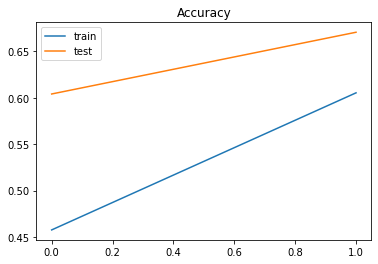

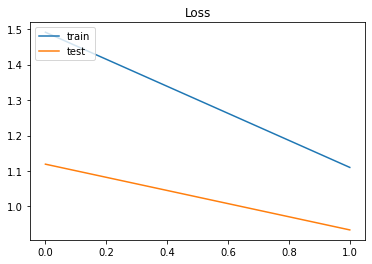

In [50]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 정규화하기 --- (*2)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=2,
    verbose=1,
    validation_data=(X_test, y_test))

# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
model.save_weights('cifar10-cnn-weight.h5')

In [52]:
import cv2

In [53]:
import numpy as np

In [54]:
labels = ['air', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [55]:
im_size = 32* 32 * 3

In [56]:
model.load_weights('cifar10-cnn-weight.h5')

In [57]:
im = cv2.imread('test-car.jpg')

In [58]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [59]:
im = cv2.resize(im, (32, 32))

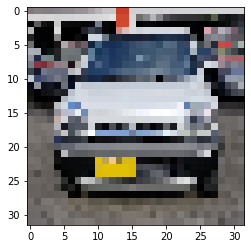

In [60]:
plt.imshow(im)
plt.show()

In [61]:
r = model.predict(np.array([im]), batch_size=32, verbose=1)
res = r[0]

1/1 [==============================] - 0s 32ms/step


In [62]:
for i, acc in enumerate(res):
  print(labels[i], '=', int(acc * 100))
print('-------')
print('예측한 결과 = ',  labels[res.argmax()])

air = 0
automobile = 100
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 0
ship = 0
truck = 0
-------
예측한 결과 =  automobile
